In [ ]:

import sys,os,os.path
os.environ['IBM_DB_HOME']='C:\Program Files\IBM\SQLLIB'
!pip install ipython-sql
!pip install ibm_db 
!pip install ibm_db_sa

In [1]:
import ibm_db

In [2]:
dsn_hostname = "dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "mgp34180"        # e.g. "abc12345"
dsn_pwd = "0hk5r6jt6rt8-d9f"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP" 

In [3]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=mgp34180;PWD=0hk5r6jt6rt8-d9f;


In [4]:
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  mgp34180 on host:  dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net


In [5]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [6]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.01.0405
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1252
CONN_CODEPAGE:         1208


In [8]:
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

In [9]:
createQuery = "CREATE TABLE INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, F_NAME VARCHAR(20), L_NAME VARCHAR(20), CITY VARCHAR(20), C_CODE CHAR(2))"
                                      

createStmt = ibm_db.exec_immediate(conn, createQuery)


In [10]:
insertQuery = "INSERT INTO INSTRUCTOR VALUES ('1', 'Ravi', 'Aishwary', 'New Delhi', 'IN')"

insertStmt = ibm_db.exec_immediate(conn, insertQuery)

In [11]:
insertQuery2 = "INSERT INTO INSTRUCTOR VALUES('2', 'Klaus', 'Mikaelson', 'New Orleans', 'LU'), ('3', 'Nina', 'Dobrev', 'Los Angeles', 'CA') "

insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

In [12]:
ibm_db.close(conn)

True

In [3]:
import ibm_db

In [4]:
dsn_hostname = "dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "mgp34180"        # e.g. "abc12345"
dsn_pwd = "0hk5r6jt6rt8-d9f"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP" 

In [5]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=mgp34180;PWD=0hk5r6jt6rt8-d9f;


In [6]:
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  mgp34180 on host:  dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net


In [7]:
selectQuery = "select * from INSTRUCTOR"

selectStmt = ibm_db.exec_immediate(conn, selectQuery)

ibm_db.fetch_both(selectStmt)

{'ID': 1,
 0: 1,
 'F_NAME': 'Ravi',
 1: 'Ravi',
 'L_NAME': 'Aishwary',
 2: 'Aishwary',
 'CITY': 'New Delhi',
 3: 'New Delhi',
 'C_CODE': 'IN',
 4: 'IN'}

In [7]:
#Fetch the rest of the rows and print the ID and FNAME for those rows

while ibm_db.fetch_row(selectStmt) != False:
    print(" ID:", ibm_db.result(selectStmt, 0), "F_NAME:", ibm_db.result(selectStmt, "F_NAME"))

 ID: 2 F_NAME: Klaus
 ID: 3 F_NAME: Nina


In [16]:
updateQuery = "update INSTRUCTOR set CITY = 'London' where F_NAME = 'Klaus'"

updateStmt = ibm_db.exec_immediate(conn, updateQuery)

In [8]:
import pandas
import ibm_db_dbi

In [19]:
import sys
sys.version

'3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]'

In [9]:
#connection for pandas

pconn = ibm_db_dbi.Connection(conn)

In [10]:
#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print just the LNAME for first row in the pandas data frame
pdf.L_NAME[0]


'Aishwary'

In [11]:
#print the entire data frame
pdf

,ID,F_NAME,L_NAME,CITY,C_CODE
0,1,Ravi,Aishwary,New Delhi,IN
1,2,Klaus,Mikaelson,London,LU
2,3,Nina,Dobrev,Los Angeles,CA


In [12]:
pdf.shape

(3, 5)

In [29]:
ibm_db.close(conn)

True

In [2]:
%load_ext sql

In [31]:
%reload_ext sql

In [4]:
%sql ibm_db_sa://mgp34180:0hk5r6jt6rt8-d9f@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB

In [3]:
import ibm_db_sa

In [4]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * ibm_db_sa://mgp34180:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.
99 rows affected.


[]

In [5]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://mgp34180:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [7]:
test_score_distribution = %sql SELECT test_score as "Test_Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;


 * ibm_db_sa://mgp34180:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


In [8]:
test_score_distribution

test_score,frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

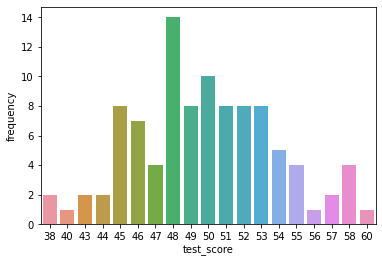

In [13]:
dataframe = test_score_distribution.DataFrame()
%matplotlib inline

import seaborn

plot = seaborn.barplot(x='test_score', y='frequency', data=dataframe)


In [14]:
%%sql

select country, first_name, last_name, test_score from INTERNATIONAL_STUDENT_TEST_SCORES ;

 * ibm_db_sa://mgp34180:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


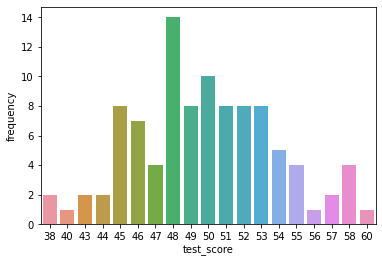

In [10]:
dataframe = test_score_distribution.DataFrame()
%matplotlib inline

import seaborn

plot = seaborn.barplot(x='test_score', y='frequency', data=dataframe)

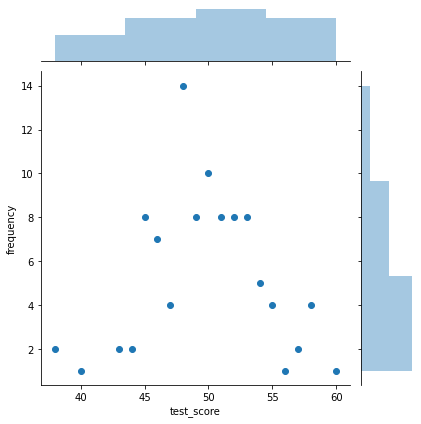

In [11]:
seaborn.jointplot(x = 'test_score', y = 'frequency', data = dataframe);